## Representing signal using orthonormal signals

In this assignment, we will generate orthonormal vectors using the rows of a Hadamard matrix. Read the Wikipedia page https://en.wikipedia.org/wiki/Hadamard_matrix to find out more about these matrices. 

We will then use the orthonormal vectors to approximate different functions. 

We start by loading some libraries that we will need. Since this is all running your browser it might take many seconds to load the numpy library. Also, you will need an active internet connection to install the IPyWidgets library.

Use shift-Enter or the play button above (a rightward facing triangle) to execute each line of code and move to the next line.

In [2]:
import numpy as np

# I often avoid importing functions into our global namespace, but I hope that this will be 
# faster in JupyterLite than importing the whole library:
from scipy.linalg import hadamard

In [2]:
import micropip

await micropip.install('ipywidgets')
await micropip.install('ipympl')



ModuleNotFoundError: No module named 'micropip'

In [7]:
import matplotlib.pyplot as plt
#%matplotlib ipympl

In [3]:
from ipywidgets import interact
import ipywidgets as widgets


Choose a reasonably small power of 2. We need a power of 2 because we will represent a function (here, implemented as a vector of the function values on an interval) using the normalized rows of a Hadamard matrix as the orthonormal functions 

In [4]:
N=16

Generate a function, g, that is a sinusoid with N samples in about a 1 s interval:

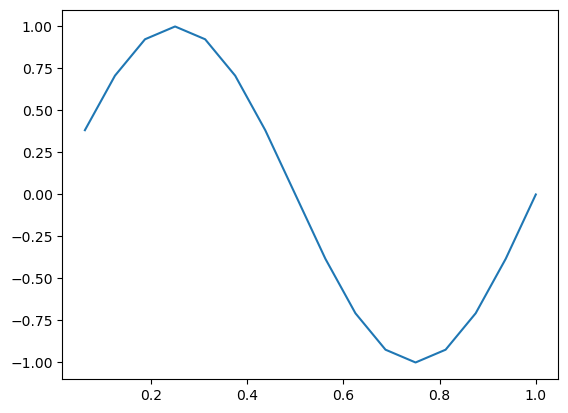

In [8]:
t=np.linspace(1/N,1, N)
g=np.sin(2*np.pi*t)
plt.figure()
plt.plot(t, g);

Now generate a Hadamard matrix  and print it out. 

In [10]:
print(hadamard(N))

[[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
 [ 1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1]
 [ 1  1 -1 -1  1  1 -1 -1  1  1 -1 -1  1  1 -1 -1]
 [ 1 -1 -1  1  1 -1 -1  1  1 -1 -1  1  1 -1 -1  1]
 [ 1  1  1  1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1]
 [ 1 -1  1 -1 -1  1 -1  1  1 -1  1 -1 -1  1 -1  1]
 [ 1  1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1  1  1]
 [ 1 -1 -1  1 -1  1  1 -1  1 -1 -1  1 -1  1  1 -1]
 [ 1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1 -1  1 -1  1 -1  1 -1 -1  1 -1  1 -1  1 -1  1]
 [ 1  1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1  1  1]
 [ 1 -1 -1  1  1 -1 -1  1 -1  1  1 -1 -1  1  1 -1]
 [ 1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1]
 [ 1 -1  1 -1 -1  1 -1  1 -1  1 -1  1  1 -1  1 -1]
 [ 1  1 -1 -1 -1 -1  1  1 -1 -1  1  1  1  1 -1 -1]
 [ 1 -1 -1  1 -1  1  1 -1 -1  1  1 -1  1 -1 -1  1]]


We need the rows to have norm 1, so we can do a simple normalization.

In [11]:
H=1/np.sqrt(N)*hadamard(N)[:]
print(H)

[[ 0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25
   0.25  0.25  0.25  0.25]
 [ 0.25 -0.25  0.25 -0.25  0.25 -0.25  0.25 -0.25  0.25 -0.25  0.25 -0.25
   0.25 -0.25  0.25 -0.25]
 [ 0.25  0.25 -0.25 -0.25  0.25  0.25 -0.25 -0.25  0.25  0.25 -0.25 -0.25
   0.25  0.25 -0.25 -0.25]
 [ 0.25 -0.25 -0.25  0.25  0.25 -0.25 -0.25  0.25  0.25 -0.25 -0.25  0.25
   0.25 -0.25 -0.25  0.25]
 [ 0.25  0.25  0.25  0.25 -0.25 -0.25 -0.25 -0.25  0.25  0.25  0.25  0.25
  -0.25 -0.25 -0.25 -0.25]
 [ 0.25 -0.25  0.25 -0.25 -0.25  0.25 -0.25  0.25  0.25 -0.25  0.25 -0.25
  -0.25  0.25 -0.25  0.25]
 [ 0.25  0.25 -0.25 -0.25 -0.25 -0.25  0.25  0.25  0.25  0.25 -0.25 -0.25
  -0.25 -0.25  0.25  0.25]
 [ 0.25 -0.25 -0.25  0.25 -0.25  0.25  0.25 -0.25  0.25 -0.25 -0.25  0.25
  -0.25  0.25  0.25 -0.25]
 [ 0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25 -0.25 -0.25 -0.25 -0.25
  -0.25 -0.25 -0.25 -0.25]
 [ 0.25 -0.25  0.25 -0.25  0.25 -0.25  0.25 -0.25 -0.25  0.25 -0.25  0.25
  -0.25  0.25 -0.

By multiplying the H matrix by its transpose, we will calculate all the inner products:

In [12]:
H@H.T

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

Find the coefficients that represent the sinusoid. We need to take the inner (dot) product of f with each row of H. This is easily implemented through matrix multiplication:

In [13]:
g_rep=g@H.T
g_rep

array([-5.72118873e-18,  2.27765794e-16,  1.44499067e-16,  1.33056689e-16,
        2.83276945e-16,  1.60812265e-16, -1.72254642e-16, -1.60812265e-16,
        2.51366975e+00,  9.94561837e-02,  2.07106781e-01, -2.07106781e-01,
        5.00000000e-01, -5.00000000e-01, -1.04119610e+00, -4.11961001e-02])

The following function generates an interactive plot. You can use the slider to adjust the number of orthonormal functions that will be used in approximating the function g:

In [34]:
def plot_approximate(g):
    '''
    Plot the approximate representation of a vector g using the rows of the Hadamard matrix 
    as a basis.  This function provides a slider that will allow the user to select how many
    rows are used, where the rows that have the largest magnitude coefficients will be used.
    
    John M. Shea
    1/10/2022
    '''
    
    # Some of the followin lines are duplicates from above; they make this function self-contained
    N=len(g)
    
    # Make sure that N is a power of 2:
    assert ((N & (N-1) == 0) and N != 0), "The length of vector g must be a power of 2"
    
    H=1/np.sqrt(N)*hadamard(N)[:]
    g_rep=g@H.T


    # Get the locations of the coefficients in order of magnitude
    importance=np.argsort(np.abs(g_rep))
    
    plt.ioff()
    fig, ax = plt.subplots(1, figsize=(10, 4))

    
    def plot_importance(num_coefficients):
        
        N=len(g)
        truncated_importance = importance[ (N - num_coefficients) : ]
        g_hat = g_rep[truncated_importance] @ H[truncated_importance]
        ax.set_xlabel('t')
        ax.clear()
        ax.plot(t, g, label=f'$g(x)$')
        ax.plot(t, g_hat, linestyle=':', label=f'$\hat{{g}}(x)$', linewidth=3, alpha=0.5)
        ax.set_ylim(-1.2, 1.2)

        signal_energy = np.linalg.norm(g)**2
        error_energy = np.linalg.norm(g-g_hat)**2
        ax.set_title(f"% Error = {100*error_energy/signal_energy:.3g}")
        ax.legend()
        fig.show()
        
        
    interact(plot_importance, num_coefficients=widgets.IntSlider(min=1, max=N, step=1, value=1,
                                                                 description='# components',
                                                                 style={'description_width':'initial'}) ) 

    

In [35]:
g=np.sin(2*np.pi*t)  # Edit this line to try different functions

plot_approximate(g)

interactive(children=(IntSlider(value=1, description='# components', max=16, min=1, style=SliderStyle(descript…

What do you observe?

## Assignment


Record and submit your answers to the following:

For each of the following waveforms, how many coefficients are needed to achieve 1% error? 0.1% error? and 0.01% error?

1) sin at 1 Hz
2) sin at 2 Hz
3) sin at 0.5 Hz
4) cos at 1 Hz
5) exp(t)
6) exp (-t)
7) log (t)

You may submit a Jupyter notebook, a text document, or you can handwrite your answers and scan to a PDF.

If you are recording your answers in the JupyterLite notebook, then be sure to use File->Download to get the notebook with your changes. 

(When you make changes to the JupyterLite notebook, they are stored on your local machine using HTML5 Local Storage. These changes do not affect anything in GitHub.)

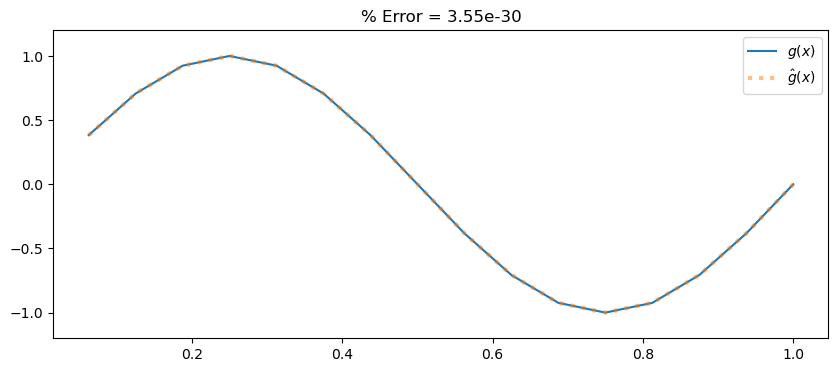

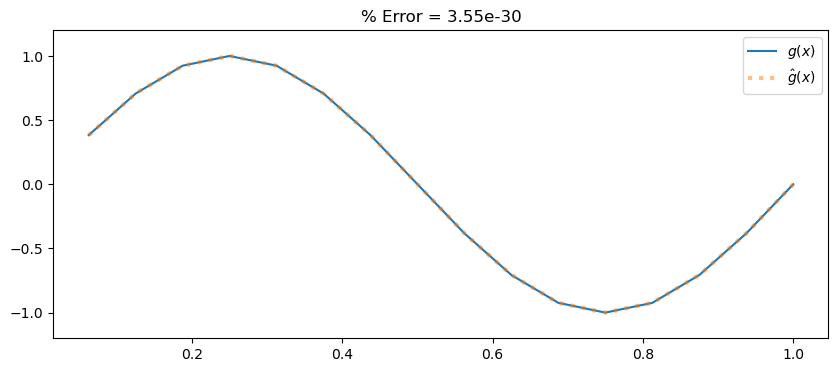

In [9]:
import time


H=1/np.sqrt(N)*hadamard(N)[:]
g_rep=g@H.T


# Get the locations of the coefficients in order of magnitude
importance=np.argsort(np.abs(g_rep))

fig, ax = plt.subplots(1, figsize=(10, 4))
hfig = display(fig, display_id=True)

N=len(g)
for num_coefficients in range(1,16):
  truncated_importance = importance[ (N - num_coefficients) : ]
  g_hat = g_rep[truncated_importance] @ H[truncated_importance]
  ax.set_xlabel('t')
  ax.clear()
  ax.plot(t, g, label=f'$g(x)$')
  ax.plot(t, g_hat, linestyle=':', label=f'$\hat{{g}}(x)$', linewidth=3, alpha=0.5)
  ax.set_ylim(-1.2, 1.2)

  signal_energy = np.linalg.norm(g)**2
  error_energy = np.linalg.norm(g-g_hat)**2
  ax.set_title(f"% Error = {100*error_energy/signal_energy:.3g}")
  ax.legend()
  fig.canvas.draw()
  hfig.update(fig)

  time.sleep(0.2)

  
